# Proyek Analisis Data: Bike Sharing Dataset
- Nama: Afrizal Rizqi Syahputra
- Email: afrizalrizqi02@gmail.com
- Id Dicoding:

## Menentukan Pertanyaan Bisnis

- pertanyaan 1 : Pada cuaca apa yang paling banyak dan paling sedikit pengguna?
- pertanyaan 2 : Bagaimana perbedaan penggunaan sepeda antara pengguna terdaftar dan pengguna biasa?

## Menyaipkan semua library yang dibuthkan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
bike_sharing = pd.read_csv("https://raw.githubusercontent.com/afrizalrizqi/Bike-Sharing/main/data/day.csv")
bike_sharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

In [3]:
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [4]:
bike_sharing.duplicated().sum()

0

Membuat ringkasan parameter

In [5]:
bike_sharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Cleaning Data

terdapat kesalahan data pada tipe data dteday

In [6]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  bike_sharing[column] = pd.to_datetime(bike_sharing[column])

bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

## Exploratory Data Analysis (EDA)

### Explore ...

- pertanyaan 1 : Pada cuaca apa yang paling banyak dan paling sedikit pengguna?
- pertanyaan 2 : Bagaimana perbedaan penggunaan sepeda antara pengguna terdaftar dan pengguna biasa?

In [7]:
question1 = bike_sharing.groupby(by="weathersit").dteday.nunique().sort_values(ascending=False)

In [8]:
registered_users = bike_sharing[bike_sharing["registered"] > 0]
casual_users = bike_sharing[bike_sharing["casual"] > 0]

registered_users_count = bike_sharing["registered"].sum()
casual_users_count = bike_sharing["casual"].sum()

print("Jumlah pengguna terdaftar : ", registered_users_count)
print("Jumlah pengguna biasa : ", casual_users_count)

if registered_users_count > casual_users_count:
  print("Registered users lebih banyak")
else:
  print("Casual users lebih banyak")

Jumlah pengguna terdaftar :  2672662
Jumlah pengguna biasa :  620017
Registered users lebih banyak


## Visualization & Explanatory Analysis

### Pertanyaan 1:

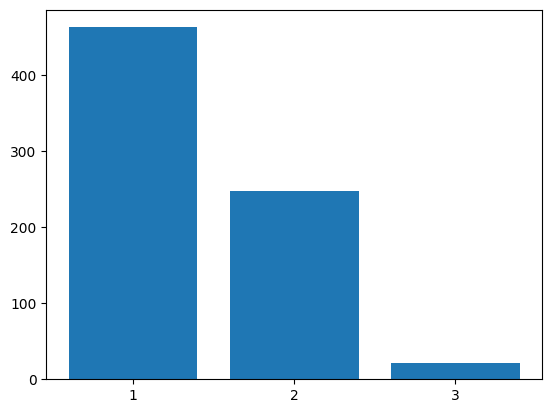

In [9]:
question1

plt.bar(['1','2','3'], question1)
plt.show()

### Pertanyaan 2:

registered    2672662
casual         620017
dtype: int64


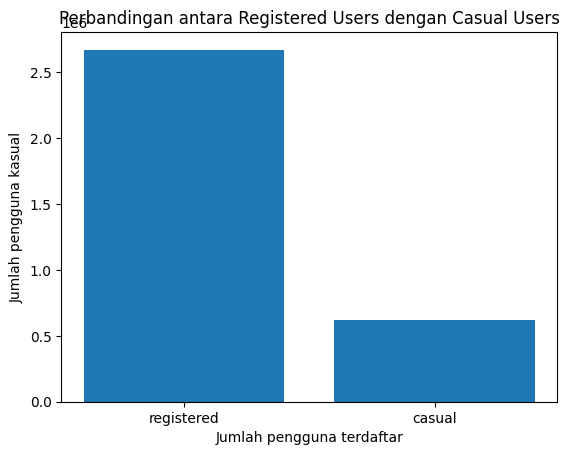

In [10]:
# Mengambil data
data = bike_sharing[["registered", "casual"]]


# Mengurutkan data berdasarkan kolom "registered"
data = data.sort_values(by="registered", ascending=False)
data = data.sum()

plt.title("Perbandingan antara Registered Users dengan Casual Users")
print(data)
plt.bar(["registered","casual"], data)
plt.xlabel("Jumlah pengguna terdaftar")
plt.ylabel("Jumlah pengguna kasual")

# Menampilkan plot
plt.show()


## Conclusion

- Conclution pertanyaan 1

- Pada pertanyaan pertama yaitu pada cuaca apa yang paling banyak dan paling sedikit pengguna? Berdasarkan hasil analisis yaitu terdapat 4 kategori cuaca yang dilalui dan yang paling banyak pengguna yaitu ketika kategori 1 atau Clear, Few clouds, Partly cloud dan yang paling sedikit pengguna yaitu kategori 4 atau Heavy rain + Ice Pallets + Thunderstrom + Mist, Snow + Fog karena berdasarkan data tidak ada pengguna ketika datang cuaca tersebut maka 0 pengguna sehingga dapat disimpulkan bahwa pengguna paling sedikit yaitu pada cuaca 4.




- Conclution pertanyaan 2
- Konklusi pada pertanyaan kedua yaitu perbedaan antara registered users dengan casual users sangat drastis perbedaannya yaitu registered users sebanyak 2672662 users sedangkan casual users sebanyak 620017 sehingga dapat disimpulkan pengguna yang lebih banyak menggunakan yaitu registered users atau pengguna yang telah terdaftar.